In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate and write call sets

The FDR for Microglia-like cells have been gradually lowered to $10^{-5}$ to have fewer than 150 genes in both the up and down regulated genesets.

In [2]:
def make_genesets(celltype, fpath, fdr):
    df = pd.read_excel(fpath, sheet_name=celltype, dtype={'Gene Symbol': 'str'})
    df = df.loc[df['Adjusted p-value'] <= fdr, :]
    up, down = [df.loc[foo(df.log2FoldChange), 'Gene Symbol'].to_list() for foo in [lambda x: x > 0, lambda x: x < 0]]
    de = up + down
    up.sort()
    down.sort()
    de.sort()
    gsets = {'up': set(up), 'down': set(down), 'de': set(up).union(set(down))}
    for name, glist in zip(gsets.keys(), [up, down, de]):
        fpath = '../../results/2021-12-08-apoe-de-genes-tunahan/' + celltype + '-apoe-' + name
        glist = [x + '\n' for x in glist]
        with open(fpath, 'w') as f:
            f.writelines(glist)
    return(gsets)

fpath = '../../resources/apoe-DE-genes-tunahan/apoe-GSE102956-deseq2-results.xlsx'
# Note the much lower FDR cutoff for Microglia-like cells
iterator = zip(['Neuron', 'Astrocyte', 'Microglia-like'], [5e-2, 5e-2, 1e-5])
apoe = {celltype: make_genesets(celltype, fpath, fdr) for celltype, fdr in iterator}

In [3]:
{k: len(apoe[k]['de']) for k in apoe.keys()}

{'Neuron': 64, 'Astrocyte': 159, 'Microglia-like': 162}

## Overlap of gene sets among the three cell types 

named-figure/Neuron-Astrocyte-Microglia-like-de-venn.png
named-figure/Neuron-Astrocyte-Microglia-like-up-venn.png
named-figure/Neuron-Astrocyte-Microglia-like-down-venn.png


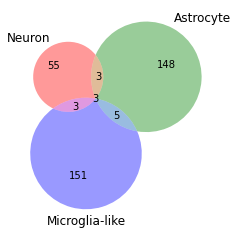

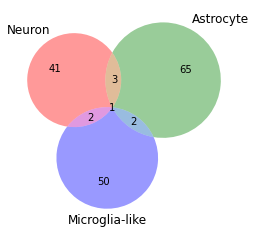

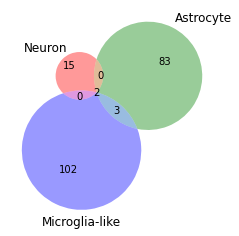

In [4]:
def my_venn3(direction='de', apoe=apoe):
    partition = dict()
    N = apoe['Neuron'][direction]
    A = apoe['Astrocyte'][direction]
    M = apoe['Microglia-like'][direction]
    partition['100'] = N.difference(A.union(M))
    partition['010'] = A.difference(N.union(M))
    partition['001'] = M.difference(N.union(A))
    partition['110'] = N.intersection(A).difference(M)
    partition['101'] = N.intersection(M).difference(A)
    partition['011'] = A.intersection(M).difference(N)
    partition['111'] = N.intersection(A).intersection(M)
    subsets = {k: len(v) for k, v in partition.items()}
    fig, ax = plt.subplots()
    venn3(subsets=subsets, set_labels=('Neuron', 'Astrocyte', 'Microglia-like'))
    return((fig, ax, subsets))

for direction in ['de', 'up', 'down']:
    fig, ax, subsets = my_venn3(direction=direction)
    figname = 'Neuron-Astrocyte-Microglia-like-' + direction + '-venn'
    print('named-figure/' + figname + '.png')
    attila_utils.savefig(fig, figname)

In [5]:
%connect_info

{
  "shell_port": 62516,
  "iopub_port": 62517,
  "stdin_port": 62518,
  "control_port": 62520,
  "hb_port": 62519,
  "ip": "127.0.0.1",
  "key": "47219302-4235e8ab2b1af2e6bbf359ba",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-1a3a7b09-e9ac-486d-8b11-9242935c2f77.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
